In [1]:
import pandas as pd
import numpy as np
import shared
import json


ve_or_ju = "ve"

In [2]:
history = pd.read_csv(f'data/grouped_paces_{ve_or_ju}.tsv', delimiter="\t")
history.head()

,mean_team_id,teams,name,num_runs,num_valid_times,mean_pace,stdev,most_common_leg,most_common_country,pace_1,pace_2,pace_3,pace_4,pace_5,pace_6,pace_7
0,7.0,STORA TUNA OK,anna mårsell,3,3,6.649,0.404,1,SWE,6.441,7.214,6.291,NaN,NaN,NaN,NaN
1,27.5,IFK MORAS OK;STORA TUNA OK,magdalena olsson,6,6,7.096,0.609,2,SWE,6.511,7.381,7.676,7.710,6.062,7.234,NaN
2,3.0,STORA TUNA OK,julia jakob,1,1,5.944,0.000,3,SWE,5.944,NaN,NaN,NaN,NaN,NaN,NaN
3,8.5,STORA TUNA OK,tove alexandersson,6,6,6.077,0.362,4,SWE,5.711,6.042,6.289,6.008,5.672,6.738,NaN
4,61.0,EKSJÖ SOK;GÖTEBORG MAJORNA OK,lisa holer,4,3,7.328,0.845,4,SWE,6.567,6.911,8.507,NaN,NaN,NaN,NaN


In [3]:
# HISTORY: ""mean_team_id"	"teams"	"name"	"num_runs"	"num_valid_times"	"mean_pace"	"stdev"	"most_common_leg"	"most_common_country"	
# "pace_1"	"pace_2"	"pace_3"	"pace_4"	"pace_5"	"pace_6"	"pace_7"
# RUNS: "team"	"team_country"	"pace"	"leg_nro"	"num_runs"
history["leg_nro"] = history["most_common_leg"]
history["team_id"] = history["mean_team_id"]
history["team_country"] = history["most_common_country"]






In [4]:
(top_countries, top_first_names) = shared.read_persisted_dummy_column_values(ve_or_ju)

In [5]:
features = shared.preprocess_features(history, top_countries, ve_or_ju)
features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14424 entries, 0 to 14423
Data columns (total 19 columns):
mean_team_id           14424 non-null float64
teams                  14424 non-null object
name                   14424 non-null object
num_runs               14424 non-null int64
num_valid_times        14424 non-null int64
mean_pace              13831 non-null float64
stdev                  13831 non-null float64
most_common_leg        14424 non-null int64
most_common_country    14329 non-null object
pace_1                 13831 non-null float64
pace_2                 7865 non-null float64
pace_3                 5489 non-null float64
pace_4                 3851 non-null float64
pace_5                 2653 non-null float64
pace_6                 1579 non-null float64
pace_7                 596 non-null float64
leg_nro                14424 non-null int64
team_id                14424 non-null float64
team_country           14329 non-null object
dtypes: float64(11), int64(4), objec

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 931 entries, 0 to 930
Data columns (total 3 columns):
first_name           930 non-null object
fn_pace_class        931 non-null int64
fn_pace_std_class    931 non-null int64
dtypes: int64(2), object(1)
memory usage: 21.9+ KB


None

[]

,team_id,team_id_log10,team_id_square,leg_1,leg_2,leg_3,leg_4,c_EST,c_FIN,c_GBR,...,fn_pace_class_6.0,fn_pace_class_7.0,fn_pace_class_8.0,fn_pace_class_9.0,fn_pace_class_nan,fn_pace_std_class_0.0,fn_pace_std_class_1.0,fn_pace_std_class_2.0,fn_pace_std_class_3.0,fn_pace_std_class_nan
0,7.0,0.845098,49.00,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,27.5,1.439333,756.25,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,3.0,0.477121,9.00,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,8.5,0.929419,72.25,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,61.0,1.785330,3721.00,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,15.0,1.176091,225.00,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
6,14.0,1.146128,196.00,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,14.0,1.146128,196.00,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
8,11.0,1.041393,121.00,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
9,9.0,0.954243,81.00,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [6]:
features.shape

(14424, 40)

In [7]:
gbr_sd_estimate = shared.predict_without_history(features, ve_or_ju)


,log_q_low,predicted,log_q_high,log_std
0,1.858,7.002,2.061,0.102
1,1.796,6.540,2.043,0.124
2,1.797,6.871,2.070,0.137
3,1.787,6.624,2.045,0.129
4,1.928,7.742,2.157,0.115
5,1.815,6.420,2.019,0.102
6,1.853,7.236,2.060,0.103
7,1.846,6.626,2.031,0.092
8,1.859,6.906,1.990,0.066
9,1.874,6.798,2.095,0.111


0.17939981322331414

In [8]:
#history['prior_mean'] = np.exp(pmlearn_preds[0])
#history['prior_std'] = np.exp(pmlearn_preds[1])
history['prior_mean'] = gbr_sd_estimate["predicted"]
history['prior_log_std'] = gbr_sd_estimate["log_std"]


In [9]:
history['prior_mean_error'] = np.abs(history['prior_mean'] - history['mean_pace'])
display(np.mean(history['prior_mean_error']))
history['prior_mean_error_in_sd'] = history['prior_mean_error'] / np.exp(history['prior_log_std'])
display(np.mean(history['prior_mean_error_in_sd']))


1.3718207260380644

1.1334803387731454

In [10]:
history.head(5)

,mean_team_id,teams,name,num_runs,num_valid_times,mean_pace,stdev,most_common_leg,most_common_country,pace_1,...,pace_5,pace_6,pace_7,leg_nro,team_id,team_country,prior_mean,prior_log_std,prior_mean_error,prior_mean_error_in_sd
0,7.0,STORA TUNA OK,anna mårsell,3,3,6.649,0.404,1,SWE,6.441,...,NaN,NaN,NaN,1,7.0,SWE,7.001581,0.101571,0.352581,0.318528
1,27.5,IFK MORAS OK;STORA TUNA OK,magdalena olsson,6,6,7.096,0.609,2,SWE,6.511,...,6.062,7.234,NaN,2,27.5,SWE,6.539818,0.123607,0.556182,0.491513
2,3.0,STORA TUNA OK,julia jakob,1,1,5.944,0.000,3,SWE,5.944,...,NaN,NaN,NaN,3,3.0,SWE,6.871303,0.136629,0.927303,0.808881
3,8.5,STORA TUNA OK,tove alexandersson,6,6,6.077,0.362,4,SWE,5.711,...,5.672,6.738,NaN,4,8.5,SWE,6.624376,0.128867,0.547376,0.481194
4,61.0,EKSJÖ SOK;GÖTEBORG MAJORNA OK,lisa holer,4,3,7.328,0.845,4,SWE,6.567,...,NaN,NaN,NaN,4,61.0,SWE,7.741847,0.114510,0.413847,0.369070


In [11]:
log_stdev = np.nanstd(np.log(history[["pace_1", "pace_2", "pace_3", "pace_4", "pace_5", "pace_6", "pace_7"]]), axis=1)
log_mean = np.nanmean(np.log(history[["pace_1", "pace_2", "pace_3", "pace_4", "pace_5", "pace_6", "pace_7"]]), axis=1)
history["log_stdev"] = log_stdev
history["log_mean"] = log_mean
history[["stdev", "log_stdev", "prior_log_std"]].describe(percentiles=[0.05, .25, .5, .75, .95, .99])

/Users/oskari/.virtualenvs/jukola-xml-model-PGRmw6ze/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1628: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/Users/oskari/.virtualenvs/jukola-xml-model-PGRmw6ze/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


,stdev,log_stdev,prior_log_std
count,13831.000000,13831.000000,14424.000000
mean,0.668336,0.057100,0.179400
std,0.840872,0.064198,0.036200
min,0.000000,0.000000,0.000000
5%,0.000000,0.000000,0.118004
25%,0.000000,0.000000,0.156760
50%,0.393000,0.038317,0.179895
75%,1.134500,0.105005,0.203679
95%,2.182500,0.171095,0.235813
99%,3.510600,0.233188,0.265178


In [12]:
history[['num_valid_times', "stdev", "prior_mean_error", "log_stdev", "prior_log_std", "prior_mean_error_in_sd"]].groupby('num_valid_times').agg("mean").round(2)


,stdev,prior_mean_error,log_stdev,prior_log_std,prior_mean_error_in_sd
num_valid_times,,,,,
0,NaN,NaN,NaN,0.20,NaN
1,0.00,1.57,0.00,0.19,1.29
2,0.99,1.65,0.08,0.19,1.35
3,1.22,1.20,0.10,0.17,1.00
4,1.24,1.14,0.11,0.17,0.96
5,1.32,0.96,0.11,0.16,0.81
6,1.28,0.87,0.12,0.16,0.74
7,1.23,0.77,0.11,0.15,0.66
8,1.46,0.97,0.12,0.14,0.84


In [13]:
history["predicted_log_pace_mean"] = history["log_mean"]
history["predicted_log_pace_std"] = history["log_stdev"]

simple_preds = history[
    ["mean_team_id", "num_valid_times", "mean_pace", "stdev", "log_stdev", "prior_mean", "prior_log_std", 
     "predicted_log_pace_mean", "predicted_log_pace_std", "name", "teams"]].round(4)
simple_preds.to_csv(f"data/simple_preds_for_runners_with_history_14062019_{ve_or_ju}.csv", sep='\t')


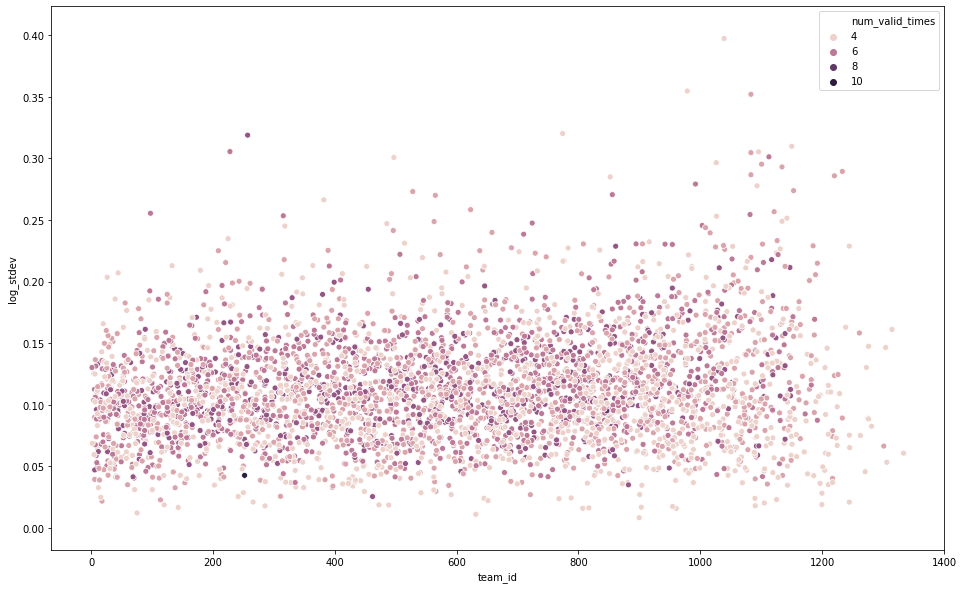

In [17]:
to_plot = history[history["num_valid_times"] > 3]
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 10))
sns.scatterplot(x="team_id", y=to_plot.log_stdev, hue="num_valid_times", data=to_plot)


In [15]:
STOP_HERE my pymc model is not right and takes too much time

SyntaxError: invalid syntax (<ipython-input-15-49b5604c12b7>, line 1)

In [ ]:

#runner_preds = history[np.logical_and(history['teams'].str.contains("RE"), history["num_valid_times"] > 1)] 
runner_preds = history.loc[
    (history['teams'].str.contains("ONS")) & 
    (history["num_valid_times"] >= 1)] 
#runner_preds = history[np.isfinite(history["pace_7"])] 
#runner_preds = history[history["num_valid_times"] >= 1] 

#display(runner_preds[["name", "num_valid_times", "mean_pace", "stdev", "prior_mean", "prior_log_std"]])
##runner_preds runner_preds = history[np.isfinite(history["pace_7"])] 

paces = runner_preds[["pace_1", "pace_2", "pace_3", "pace_4", "pace_5", "pace_6", "pace_7"]]
paces.shape

In [ ]:
runner_preds[["stdev", "log_stdev", "prior_log_std"]].describe(percentiles=[0.05, .25, .5, .75, .95, .99])

In [ ]:
log_stds = runner_preds["prior_log_std"].values
#log_stds = np.clip(runner_preds["prior_log_std"], 0.1, 1.3).values
#log_stds = runner_preds["prior_log_std"].values
np.min(log_stds)

In [ ]:
import multiprocessing
multiprocessing.cpu_count()

In [ ]:
J=np.log(paces).T.shape
display(J)
import pymc3 as pm
with pm.Model() as hierarchial:
    mu = pm.Normal('mu', mu=np.log(runner_preds["prior_mean"]).values, sd=log_stds, shape=J[1])
    # Please fix sigma, 
    sigma = pm.Lognormal('sigma',mu=log_stds, sd=0.35, shape=J[1])
    
    eta = pm.Normal('eta', 0, 1, shape=J)
    tau = pm.HalfCauchy('tau', beta=5,shape=J[1])
    #theta = pm.Normal('theta', mu=mu, sd=tau, shape=J)
    theta = pm.Deterministic('theta', mu + tau*eta)
    obs = pm.Normal('obs', mu=theta, sd=sigma, observed=np.log(paces).T)
    

In [ ]:

with hierarchial:
    nuts_args = {
        "target_accept": 0.9
    }
    short_trace = pm.sample(3000, n_init=3000, tune=5000, random_seed=2019, 
                            cores= multiprocessing.cpu_count() -1, 
                            chains=4,
                            nuts_kwargs=nuts_args)
   

In [ ]:
runner_preds = runner_preds.assign(predicted_log_pace_mean = np.mean(short_trace["mu"], axis=0))
runner_preds = runner_preds.assign(predicted_log_pace_std = np.std(short_trace["mu"], axis=0))
runner_preds = runner_preds.assign(predicted_pace = np.exp(runner_preds.predicted_log_pace_mean))
runner_preds = runner_preds.assign(predicted_pace_std = np.exp(runner_preds.predicted_log_pace_std))
runner_preds = runner_preds.assign(prior_exp_std = np.exp(runner_preds.prior_log_std))
runner_preds = runner_preds.assign(predicted_pace_sigma = np.exp(np.mean(short_trace["sigma"], axis=0)))

# 3.5 is a bit unjustified but we dont want to predict too wide interval
runner_preds["predicted_pace_sigma_fix"] = np.clip(runner_preds["predicted_pace_sigma"], 0.5, 3.5)
runner_preds["pred_pace_error"] = np.abs(runner_preds["predicted_pace"] - runner_preds["mean_pace"])
runner_preds["pred_pace_error_in_sigma"] = runner_preds["pred_pace_error"] / runner_preds["predicted_pace_sigma_fix"]
runner_preds["pred_pace_error_in_std"] = runner_preds["pred_pace_error"] / runner_preds["predicted_pace_std"]


In [ ]:
display(runner_preds[["mean_team_id", "name", "num_valid_times", "mean_pace", "stdev", "prior_mean", "prior_exp_std", 
                "predicted_pace", "pred_pace_error", "predicted_pace_std", "predicted_pace_sigma_fix", "pred_pace_error_in_sigma", "pred_pace_error_in_std"]
                    ][runner_preds['teams'].str.contains("REAK")].round(2))



In [ ]:
cleanned_up_preds = runner_preds[
    ["mean_team_id", "num_valid_times", "mean_pace", "stdev", "prior_mean", "prior_log_std", 
     "predicted_pace", "pred_pace_error", "predicted_log_pace_mean", "predicted_log_pace_std", "name", "teams"]].round(4)
cleanned_up_preds.to_csv(f"data/preds_for_runners_with_history_11062019_{ve_or_ju}.csv", sep='\t')


In [ ]:
display(np.mean(runner_preds['prior_mean_error']))
display(np.mean(runner_preds["predicted_pace_sigma_fix"]))
display(np.mean(runner_preds["pred_pace_error_in_sigma"]))
display(np.mean(runner_preds["predicted_pace_std"]))
display(np.mean(runner_preds["pred_pace_error_in_std"]))
np.mean(runner_preds["pred_pace_error"])

In [ ]:
runner_preds[["predicted_pace_sigma", "predicted_pace_sigma_fix", "pred_pace_error_in_sigma", "predicted_pace_std", "pred_pace_error_in_std", "predicted_log_pace_std"]].describe(percentiles=[0.05, .25, .5, .75, .95, .99])

In [ ]:
runner_preds[
    ['num_valid_times', "mean_pace", "stdev", "prior_mean_error", "prior_exp_std", "prior_mean_error_in_sd", "pred_pace_error", "predicted_pace_sigma_fix", "pred_pace_error_in_sigma", "predicted_pace_std", "pred_pace_error_in_std"]
].groupby('num_valid_times').agg(["median"]).round(2)

In [ ]:
# Disable traceplot for full data batches because it crashes my laptop 
# pm.traceplot(short_trace, var_names=['mu', 'sigma'])

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

%config InlineBackend.figure_format = 'retina'

mu = np.exp(short_trace['mu'])
mmu = [np.mean(mu[:i]) for i in np.arange(1, len(mu))]
plt.figure(figsize=(15, 4))
#plt.axhline(14.383, lw=2.5, color='gray')
plt.plot(mmu, lw=2.5)
#plt.ylim(0, 2)
plt.xlabel('Iteration')
plt.ylabel('MCMC mean of (mu)')
plt.title('MCMC estimation of (mu)');

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

%config InlineBackend.figure_format = 'retina'

sigma = np.exp(short_trace['sigma'])
msigma = [np.mean(sigma[:i]) for i in np.arange(1, len(sigma))]
plt.figure(figsize=(15, 4))
#plt.axhline(14.383, lw=2.5, color='gray')
plt.plot(msigma, lw=2.5)
#plt.ylim(0, 2)
plt.xlabel('Iteration')
plt.ylabel('MCMC mean of (sigma)')
plt.title('MCMC estimation of (sigma)');